In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

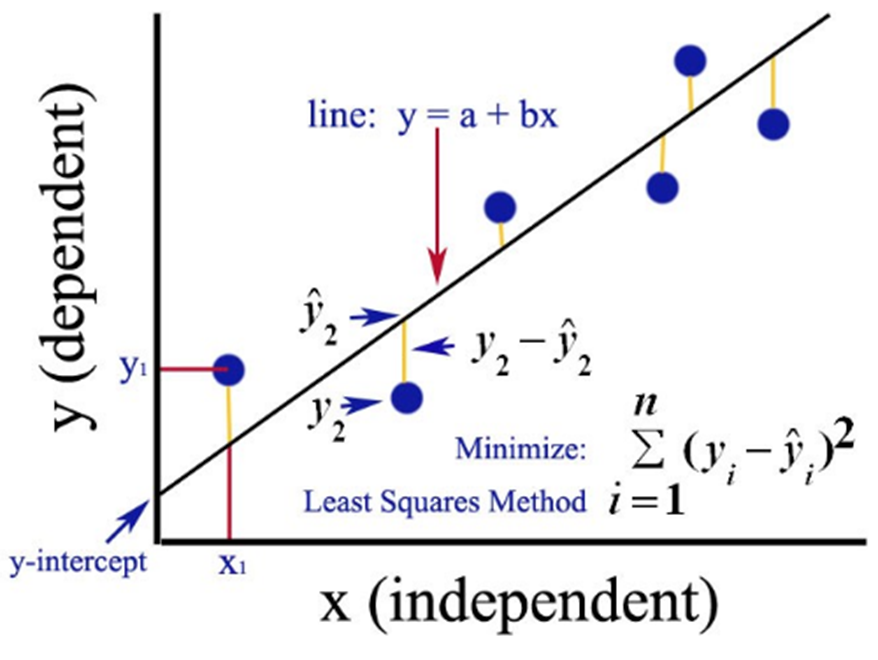

# 1- Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# 2 Perform basic data quality check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

# Understanding relation between RND and PROFIT

<Axes: xlabel='RND', ylabel='PROFIT'>

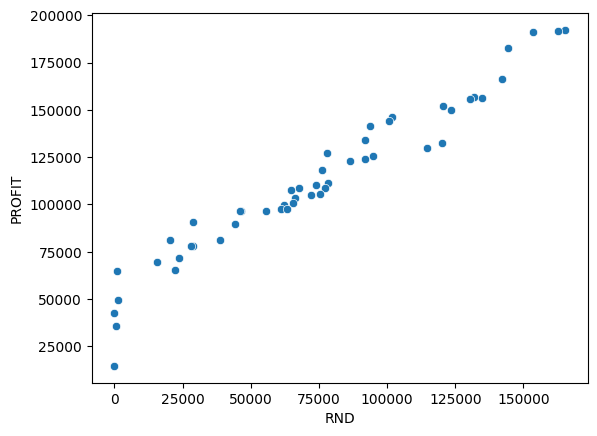

In [6]:
import seaborn as sns
sns.scatterplot(data=df, x="RND", y="PROFIT")

# Seperate X(RND) and Y(PROFIT)

In [8]:
X = df[["RND"]]
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [9]:
Y = df[["PROFIT"]]
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Step 4 - Fit the linear regression model

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

# R2 score checking
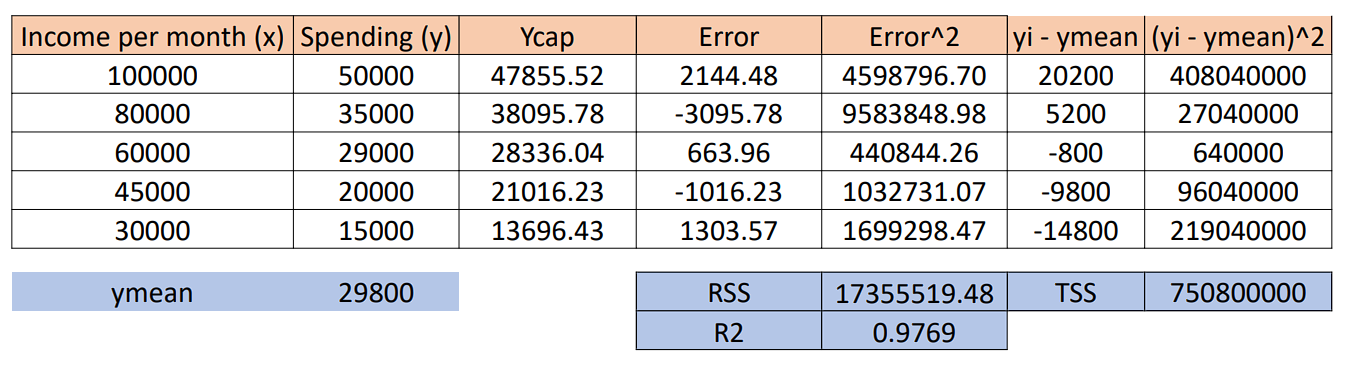

In [12]:
model.score(X,Y)

0.9465353160804393

# Checking coeffient and intercept of the line

In [13]:
model.coef_

array([[0.85429137]])

In [14]:
model.intercept_

array([49032.89914125])

# PROFIT_est = 49032.9 + 0.8543*RND
## Model Evaluation
2. Mean Squared Error (MSE)
3. Root Mean Squared Error (RMSE)
4. Mean Absolute Error (MAE)
5. Mean Absolute Percentage Error (MAPE)
6. R2 Score

In [15]:
X.head()

,RND
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [16]:
ypred = model.predict(X)
ypred[0:5]

array([[190289.29389289],
       [187938.71118575],
       [180116.65707807],
       [172369.00320589],
       [170433.97345032]])

In [17]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


In [18]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, ypred)
print(f"Mean Square Error :{mse:.2f}")

Mean Square Error :85120931.33


In [19]:
# Root mean squared error
rmse = mse**(1/2)
print(f"Root mean squared error : {rmse:.2f}")

Root mean squared error : 9226.10


In [20]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y, ypred)
print(f"Mean Absolute error : {mae:.2f}")

Mean Absolute error : 6910.98


In [21]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y, ypred)
print(f"Mean Absolute Percentage error : {mape:.4f}")


Mean Absolute Percentage error : 0.1107


In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(Y,ypred)
print(f"R2 Score : {r2:.4f}")

R2 Score : 0.9465


In [24]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

In [25]:
def evaluate_model(model,x,y):
    #predict the result for X
    ypred = model.predict(x)
    #calculate the metrics
    mse = mean_squared_error(y,ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y,ypred)
    mape = mean_absolute_percentage_error(y,ypred)
    r2 = r2_score(y,ypred)

    # print all result
    print(f"MSE : {mse:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.4f}")
    print(f"R2 Score : {r2:.4f}")

In [26]:
evaluate_model(model,X,Y)

MSE : 85120931.33
RMSE : 9226.10
MAE : 6910.98
MAPE : 0.1107
R2 Score : 0.9465


# R2 score > 0.8 is a good fit

<Axes: xlabel='RND', ylabel='PROFIT'>

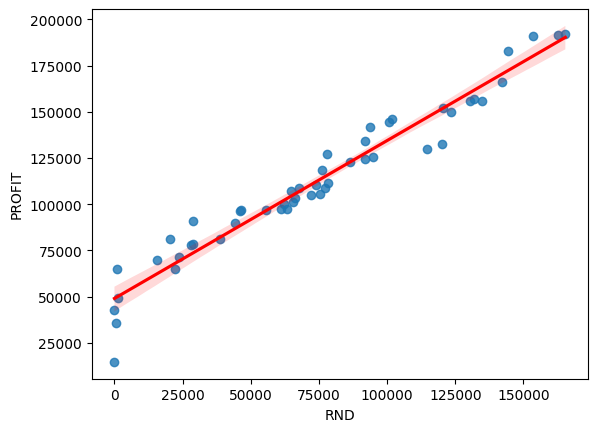

In [27]:
sns.regplot(data=df, x="RND",y="PROFIT",line_kws={"color":"red"})

# Out of Sample Prediction

In [28]:
X.values[0:5]

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34]])

In [29]:
rnd = 1_30_000
profit_est = model.predict([[rnd]])
print(f"For given rnd : {rnd}, Profit Estimated is : {profit_est}")

For given rnd : 130000, Profit Estimated is : [[160090.7773633]]
